In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from collections import Counter

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD


C:\Users\lmh23\AppData\Local\Temp\ipykernel_18960\2252302552.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


CountVectorizer

In [2]:
data = pd.read_csv('archive/abcnews-date-text.csv')
data = data.sample(100000)

# Choose a vectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=2000)
count_X = count_vectorizer.fit_transform(data['headline_text'])
count_X_array = count_X.toarray()

# Define the autoencoder architecture
count_input_dim = count_X.shape[1]  # This will be the number of features (max_features)
count_encoding_dim = 64

In [3]:
count_input_layer = Input(shape=(count_input_dim,))
count_encoded = Dense(count_encoding_dim, activation='relu')(count_input_layer)
count_decoded = Dense(count_input_dim, activation='sigmoid')(count_encoded)

In [4]:
count_autoencoder = Model(count_input_layer, count_decoded)
count_encoder = Model(count_input_layer, count_encoded)

In [5]:
count_autoencoder.compile(optimizer='adam', loss='mse')


# Train the autoencoder
count_autoencoder.fit(count_X_array, count_X_array,
                epochs=10,
                batch_size=16,
                shuffle=True,)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0177
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0016
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0015
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0013
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0011
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0011
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011


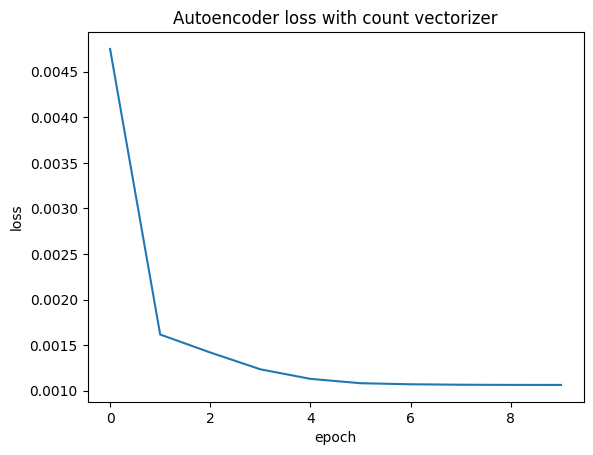

In [6]:
# plot the loss
plt.plot(count_autoencoder.history.history['loss'])
plt.title('Autoencoder loss with count vectorizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [7]:
# Get the encoded representation of the data
count_encoded_data = count_encoder.predict(count_X_array)

count_encoded_data

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step


array([[2.6991365 , 0.9580086 , 1.7357559 , ..., 2.16622   , 1.3899181 ,
        0.10093176],
       [2.3724513 , 0.        , 2.1853876 , ..., 1.1251043 , 2.4452672 ,
        0.6271227 ],
       [0.        , 3.2736285 , 2.2401948 , ..., 2.179096  , 0.16936886,
        1.6408957 ],
       ...,
       [1.6551266 , 1.7569852 , 1.0702589 , ..., 1.9583993 , 1.1432877 ,
        0.5410061 ],
       [1.2100067 , 3.5134637 , 0.33164698, ..., 0.7297628 , 1.6113901 ,
        1.1505767 ],
       [1.2584571 , 1.5203083 , 1.3191835 , ..., 1.3319589 , 1.3023115 ,
        1.3579388 ]], dtype=float32)

In [8]:
# decode the encoded data
count_reconstructed_data = count_autoencoder.predict(count_X_array)
count_reconstructed_data

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 707us/step


array([[1.34368416e-09, 2.40900078e-10, 2.81792784e-10, ...,
        2.29920652e-10, 3.17254500e-10, 2.08868908e-10],
       [7.57209684e-10, 2.09336742e-10, 1.99462308e-10, ...,
        2.10277559e-10, 1.44295936e-10, 1.51799393e-10],
       [1.10430609e-10, 2.95084200e-11, 2.70402034e-11, ...,
        2.82803329e-11, 2.69627463e-11, 1.49524854e-11],
       ...,
       [1.25997490e-09, 2.86886820e-10, 3.39675010e-10, ...,
        3.14225340e-10, 3.85039473e-10, 2.25137534e-10],
       [1.90549840e-10, 6.45039647e-11, 7.77983372e-11, ...,
        6.56129179e-11, 6.34799435e-11, 3.43912884e-11],
       [5.96348360e-10, 1.49161183e-10, 1.59191244e-10, ...,
        1.65185116e-10, 1.28308128e-10, 1.13134814e-10]], dtype=float32)

In [9]:
# decode the data
# decoded_data = autoencoder.predict(count_X_array)
# decoded_data

In [10]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [11]:
# put the data back into a lsa


n_topics = 10
count_lsa_model = TruncatedSVD(n_components=n_topics)
count_lsa_topic_matrix = count_lsa_model.fit_transform(count_reconstructed_data)

count_lsa_keys = get_keys(count_lsa_topic_matrix)
count_lsa_categories, lsa_counts = keys_to_counts(count_lsa_keys)


In [12]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    Returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order.
    '''
    top_words = []
    for topic in range(n_topics):
        mask = np.array(keys) == topic  # Create a boolean mask where the keys match the topic
        temp_vector_sum = np.sum(document_term_matrix[mask], axis=0)  # Sum the vectors for the topic
        
        # Handle different possible data types of temp_vector_sum
        if isinstance(temp_vector_sum, np.matrix):
            temp_vector_sum = temp_vector_sum.A1  # Convert matrix to 1D numpy array
        elif isinstance(temp_vector_sum, np.ndarray) and temp_vector_sum.ndim > 1:
            temp_vector_sum = temp_vector_sum.flatten()  # Flatten if it's a multidimensional numpy array
        elif hasattr(temp_vector_sum, 'toarray'):  # Check if it's a sparse matrix
            temp_vector_sum = temp_vector_sum.toarray().flatten()  # Convert sparse matrix to 1D numpy array

        top_n_word_indices = np.argsort(temp_vector_sum)[-n:][::-1]  # Get indices of top n words
        topic_words = [count_vectorizer.get_feature_names_out()[index] for index in top_n_word_indices]
        top_words.append(" ".join(topic_words))
    return top_words

In [13]:
top_n_words_lsa = get_top_n_words(5, count_lsa_keys, count_X, count_vectorizer)
for i in range(len(top_n_words_lsa)):
    print('Topic {}: '.format(i), top_n_words_lsa[i], end='')
    print(' | Topic Count: {}'.format(lsa_counts[i]))

Topic 0:  police death crash car missing | Topic Count: 54942
Topic 1:  new year years life laws | Topic Count: 8863
Topic 2:  man charged dies murder jailed | Topic Count: 9321
Topic 3:  says pm minister trump deal | Topic Count: 5159
Topic 4:  govt wa plan water qld | Topic Count: 3324
Topic 5:  australia day world cup win | Topic Count: 5367
Topic 6:  court accused face trial case | Topic Count: 6441
Topic 7:  council seeks plan plans land | Topic Count: 3604
Topic 8:  nsw australian sydney coast north | Topic Count: 1334
Topic 9:  interview killed sydney extended michael | Topic Count: 1645


In [14]:
# lda model

count_lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=42, verbose=0)
count_lda_topic_matrix = count_lda_model.fit_transform(count_reconstructed_data)

count_lda_keys = get_keys(count_lda_topic_matrix)
count_lda_categories, lda_counts = keys_to_counts(count_lda_keys)

In [15]:


results = []
top_n_words_lda = get_top_n_words(5, count_lda_keys, count_X, count_vectorizer)
for i in range(len(top_n_words_lda)):
    result = f'Topic {i}: {top_n_words_lda[i]} | Topic Count: {lda_counts[i]}'
    results.append(result)
    print(f"finished {i} of {len(top_n_words_lda)} topics")

for result in results:
    print(result)

finished 0 of 10 topics
finished 1 of 10 topics
finished 2 of 10 topics
finished 3 of 10 topics
finished 4 of 10 topics
finished 5 of 10 topics
finished 6 of 10 topics
finished 7 of 10 topics
finished 8 of 10 topics
finished 9 of 10 topics
Topic 0: plan wa health sydney farmers | Topic Count: 38034
Topic 1: day hospital china news government | Topic Count: 6402
Topic 2: interview missing search dead minister | Topic Count: 6781
Topic 3: charged murder man wins child | Topic Count: 8054
Topic 4: man australia court sa set | Topic Count: 7107
Topic 5: govt report claims plans group | Topic Count: 6487
Topic 6: council death attack budget iraq | Topic Count: 11670
Topic 7: police new says water win | Topic Count: 6275
Topic 8: nsw north coast home queensland | Topic Count: 4570
Topic 9: crash australian killed world car | Topic Count: 4620


In [16]:
# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=2000)
tfidf_X = tfidf_vectorizer.fit_transform(data['headline_text'])
tfidf_X_array = tfidf_X.toarray()

# Define the autoencoder architecture
tfidf_input_dim = tfidf_X.shape[1]  # This will be the number of features (max_features)
tfidf_encoding_dim = 64

tfidf_input_layer = Input(shape=(tfidf_input_dim,))
tfidf_encoded = Dense(tfidf_encoding_dim, activation='relu')(tfidf_input_layer)
tfidf_decoded = Dense(tfidf_input_dim, activation='sigmoid')(tfidf_encoded)

tfidf_autoencoder = Model(tfidf_input_layer, tfidf_decoded)
tfidf_encoder = Model(tfidf_input_layer, tfidf_encoded)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0173
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 4.8660e-04
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 4.8085e-04
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 4.7260e-04
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.6092e-04
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.4805e-04
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.3489e-04
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.2397e-04
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.1401e-04
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.0683e-04


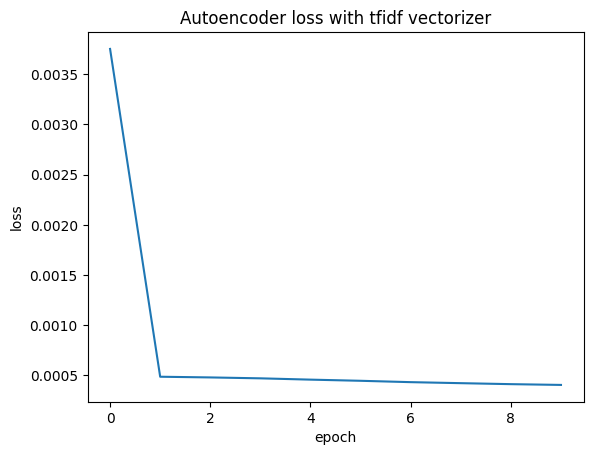

In [17]:
tfidf_autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
tfidf_autoencoder.fit(tfidf_X_array, tfidf_X_array,
                epochs=10,
                batch_size=16,
                shuffle=True,)

# plot the loss
plt.plot(tfidf_autoencoder.history.history['loss'])
plt.title('Autoencoder loss with tfidf vectorizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



In [18]:
# Get the encoded representation of the data
tfidf_encoded_data = tfidf_encoder.predict(tfidf_X_array)

# decode the encoded data
tfidf_reconstructed_data = tfidf_autoencoder.predict(tfidf_X_array)


n_topics = 10
tfidf_lsa_model = TruncatedSVD(n_components=n_topics)
tfidf_lsa_topic_matrix = tfidf_lsa_model.fit_transform(tfidf_reconstructed_data)

tfidf_lsa_keys = get_keys(tfidf_lsa_topic_matrix)
tfidf_lsa_categories, tfidf_lsa_counts = keys_to_counts(tfidf_lsa_keys)

top_n_words_tfidf_lsa = get_top_n_words(5, tfidf_lsa_keys, tfidf_X, tfidf_vectorizer)
for i in range(len(top_n_words_tfidf_lsa)):
    print('Topic {}: '.format(i), top_n_words_tfidf_lsa[i], end='')
    print(' | Topic Count: {}'.format(tfidf_lsa_counts[i]))


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step
Topic 0:  australia nsw sydney wa day | Topic Count: 80406
Topic 1:  interview extended michael john james | Topic Count: 2572
Topic 2:  man charged police murder missing | Topic Count: 2948
Topic 3:  police probe investigate hunt say | Topic Count: 2228
Topic 4:  new zealand york laws cases | Topic Count: 2795
Topic 5:  says minister pm govt opposition | Topic Count: 1687
Topic 6:  court face accused charges australia | Topic Count: 2519
Topic 7:  council govt plan water urged | Topic Count: 1805
Topic 8:  crash killed car fatal dies | Topic Count: 1782
Topic 9:  australian rural abc news market | Topic Count: 1258


In [19]:
tfidf_lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=42, verbose=0)
tfidf_lda_topic_matrix = tfidf_lda_model.fit_transform(tfidf_reconstructed_data)

tfidf_lda_keys = get_keys(tfidf_lda_topic_matrix)
tfidf_lda_categories, tfidf_lda_counts = keys_to_counts(tfidf_lda_keys)

results = []
top_n_words_tfidf_lda = get_top_n_words(5, tfidf_lda_keys, tfidf_X, tfidf_vectorizer)
for i in range(len(top_n_words_tfidf_lda)):
    result = f'Topic {i}: {top_n_words_tfidf_lda[i]} | Topic Count: {tfidf_lda_counts[i]}'
    results.append(result)
    print(f"finished {i} of {len(top_n_words_tfidf_lda)} topics")

for result in results:
    print(result)

finished 0 of 10 topics
finished 1 of 10 topics
finished 2 of 10 topics
finished 3 of 10 topics
finished 4 of 10 topics
finished 5 of 10 topics
finished 6 of 10 topics
finished 7 of 10 topics
finished 8 of 10 topics
finished 9 of 10 topics
Topic 0: police australia sydney missing home | Topic Count: 6129
Topic 1: health report sa school indigenous | Topic Count: 56896
Topic 2: crash killed dies car wa | Topic Count: 4205
Topic 3: says calls election china talks | Topic Count: 8729
Topic 4: man court charged murder world | Topic Count: 8007
Topic 5: abc news rural national sport | Topic Count: 6066
Topic 6: council death set plans claims | Topic Count: 451
Topic 7: new nsw water plan labor | Topic Count: 3138
Topic 8: interview wins michael extended john | Topic Count: 5250
Topic 9: australian govt qld south urged | Topic Count: 1129


In [20]:
# evaluate the model
# 1. coherence score
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

def get_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    return topics

def get_coherence_score(documents, topics):
    dictionary = Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    cm = CoherenceModel(topics=topics, texts=documents, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

# get the topics
lsa_count_topics = get_topics(count_lsa_model, count_vectorizer.get_feature_names_out(), 5)
lsa_tfidf_topics = get_topics(tfidf_lsa_model, tfidf_vectorizer.get_feature_names_out(), 5)
lda_count_topics = get_topics(count_lda_model, count_vectorizer.get_feature_names_out(), 5)
lda_tfidf_topics = get_topics(tfidf_lda_model, tfidf_vectorizer.get_feature_names_out(), 5)

# get the coherence score
documents = data['headline_text'].apply(lambda x: x.split())
lsa_count_coherence = get_coherence_score(documents, lsa_count_topics)
lsa_tfidf_coherence = get_coherence_score(documents, lsa_tfidf_topics)
lda_count_coherence = get_coherence_score(documents, lda_count_topics)
lda_tfidf_coherence = get_coherence_score(documents, lda_tfidf_topics)

print(f'LSA Count Coherence: {lsa_count_coherence}')
print(f'LSA Tfidf Coherence: {lsa_tfidf_coherence}')
print(f'LDA Count Coherence: {lda_count_coherence}')
print(f'LDA Tfidf Coherence: {lda_tfidf_coherence}')

LSA Count Coherence: 0.32820146765138375
LSA Tfidf Coherence: 0.3659741869372394
LDA Count Coherence: 0.34117976843248665
LDA Tfidf Coherence: 0.35114235607121747


In [31]:
# coverage
def get_topic_coverage(topic_matrix, document_term_matrix, threshold):
    '''
    returns the proportion of documents that are 
    assigned a topic with a proportion greater than 
    the threshold
    '''
    topic_proportions = np.max(topic_matrix, axis=1)
    return np.sum(topic_proportions > threshold) / len(topic_proportions)

lsa_count_coverage = get_topic_coverage(count_lsa_topic_matrix, count_X, 0.1)
lsa_tfidf_coverage = get_topic_coverage(tfidf_lsa_topic_matrix, tfidf_X, 0.1)
lda_count_coverage = get_topic_coverage(count_lda_topic_matrix, count_X, 0.5)
lda_tfidf_coverage = get_topic_coverage(tfidf_lda_topic_matrix, tfidf_X, 0.7)

print(f'LSA Count Coverage: {lsa_count_coverage}')
print(f'LSA Tfidf Coverage: {lsa_tfidf_coverage}')
print(f'LDA Count Coverage: {lda_count_coverage}')
print(f'LDA Tfidf Coverage: {lda_tfidf_coverage}')

LSA Count Coverage: 0.27694
LSA Tfidf Coverage: 0.3162
LDA Count Coverage: 0.41772
LDA Tfidf Coverage: 0.37215


In [33]:
# perplexity
def get_perplexity(model, document_term_matrix):
    return model.perplexity(document_term_matrix)

# lsa_count_perplexity = get_perplexity(count_lda_model, count_X)
# lsa_tfidf_perplexity = get_perplexity(tfidf_lda_model, tfidf_X)
lda_count_perplexity = get_perplexity(count_lda_model, count_X)
lda_tfidf_perplexity = get_perplexity(tfidf_lda_model, tfidf_X)
print(f'LDA Count Perplexity: {lda_count_perplexity}')
print(f'LDA Tfidf Perplexity: {lda_tfidf_perplexity}')

LDA Count Perplexity: 3303108.0290870266
LDA Tfidf Perplexity: 6945.062698494799
